<a href="https://colab.research.google.com/github/Romagolf/Sales-Predictions/blob/main/Sales_Predictions_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 1

Juan Gilberto Escobar

## Loading Data

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Data
# load csv from url, display info, and preview rows 
sales_predictions_df = pd.read_csv('/content/drive/MyDrive/Colab Files/sales_predictions.csv')

sales_predictions_df.info()
sales_predictions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning"

In [108]:
#1) How many rows and columns? .shape
#print("rows: " + str(len(sales_predictions_df)))
#print("Columns: " + str(len(sales_predictions_df.columns)))

sales_predictions_df.shape #more efficient way to check rows, columns

(8523, 12)

In [109]:
#2) What are the datatypes of each variable? .info() or .dtypes()

print(sales_predictions_df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [110]:
#3) Are there duplicates? If so, drop any duplicates.
print(sales_predictions_df.duplicated().sum())


0


In [111]:
#4) Identify missing values.
print("missing values: ")
print(sales_predictions_df.isna().sum())

missing values: 
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [112]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
sales_predictions_df.drop(columns = "Outlet_Size", inplace=True)
sales_predictions_df.dropna(inplace=True)

I decided to drop the missing columns: outlet_size. due to the volume of missing data within these columns, dropping the columns allows for the clean-up of the dataframe while retaining useful data from the other columns of the rows missing data withing the outlet_size and item_weight column 

For item weight, I decided that with less values missing, it would be appropriate to drop rows with missing data. the item_weight column is too important to drop

In [113]:
#6) Confirm that there are no missing values after addressing them.
print("missing values after addressing: ")
print(sales_predictions_df.isna().sum())

missing values after addressing: 
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [114]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
print("__________________")
sales_predictions_df["Item_Fat_Content"].value_counts()

sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('LF', 'Low Fat')
sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('reg', 'Regular')
sales_predictions_df['Item_Fat_Content'].value_counts()

__________________


Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [115]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
sales_predictions_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


## Exploratory Visuals

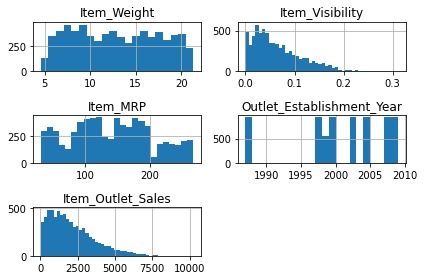

In [116]:
#Histogram to view the distributions of various features in your dataset.
sales_predictions_df.hist(bins = 'auto')
plt.tight_layout();

Based on the Histograms, we can see that most item_visibility values trend low, along with values for Item_Outlet_Sales
we can also observe a notable gap in establishment years in the 1990s

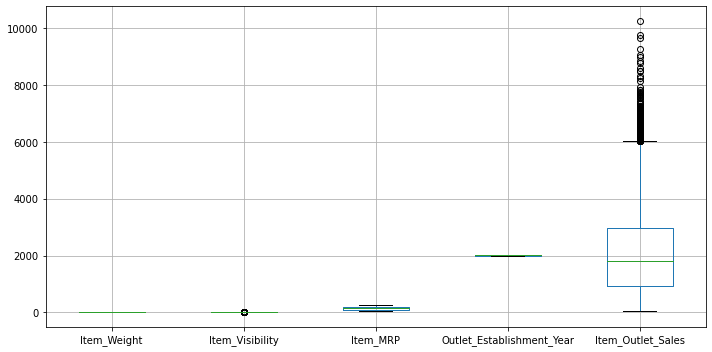

In [117]:
#Boxplot to view statistical summaries of various features in your dataset.
ax = sales_predictions_df.boxplot(figsize=(10,5))
plt.tight_layout();

based on the boxplots, we can see that Item_outlet_Sales as well as Item_visibility seem to contain the most outliers within their data

Individual Boxplots

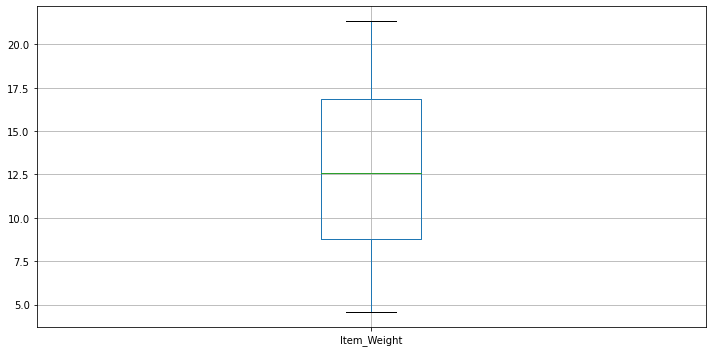

In [118]:
ax = sales_predictions_df.boxplot(figsize=(10,5), column = 'Item_Weight')
plt.tight_layout();

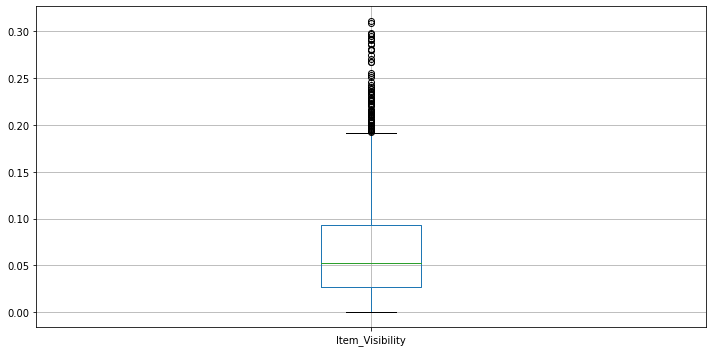

In [119]:
ax = sales_predictions_df.boxplot(figsize=(10,5), column = 'Item_Visibility')
plt.tight_layout();

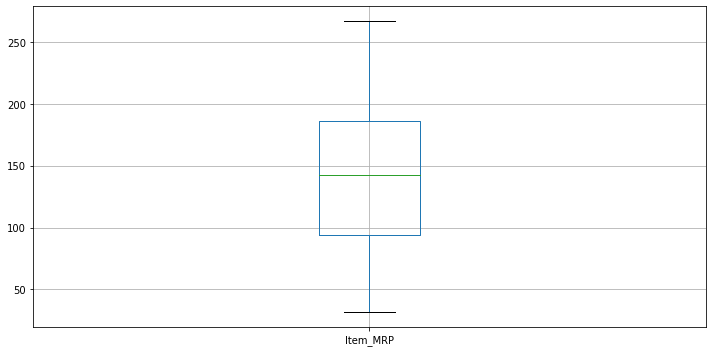

In [120]:
ax = sales_predictions_df.boxplot(figsize=(10,5), column = 'Item_MRP')
plt.tight_layout();

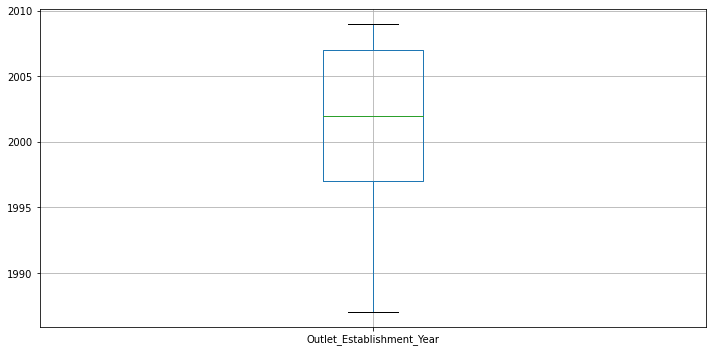

In [121]:
ax = sales_predictions_df.boxplot(figsize=(10,5), column = 'Outlet_Establishment_Year')
plt.tight_layout();

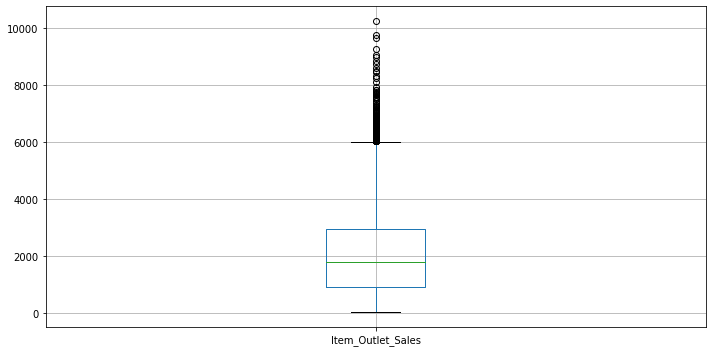

In [122]:
ax = sales_predictions_df.boxplot(figsize=(10,5), column = 'Item_Outlet_Sales')
plt.tight_layout();

<Axes: >

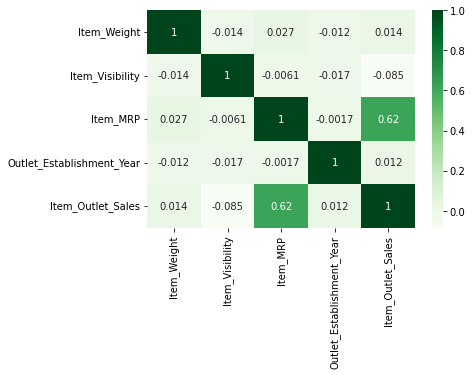

In [123]:
#Heatmap of the correlation between features.
corr = sales_predictions_df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Based on the heatmap above, we can see that most columns share little correlations except for Item_MRP and Item_Outlet_Sales which share a corr value of 0.57

## Explanatory Visuals

We can observe below that as the MRP of an item increases, we also see the Cieling of Item_Outlet_Sales increase.

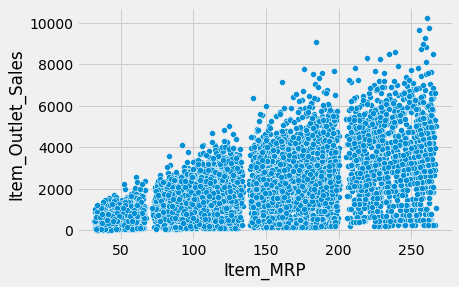

In [124]:
with plt.style.context('fivethirtyeight'):
  sns.scatterplot(data=sales_predictions_df, x='Item_MRP', y='Item_Outlet_Sales')

>We can observe below that the average sales of each item category has seafood followed by starchy foods followed by Snack foods as the top three item categories.

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

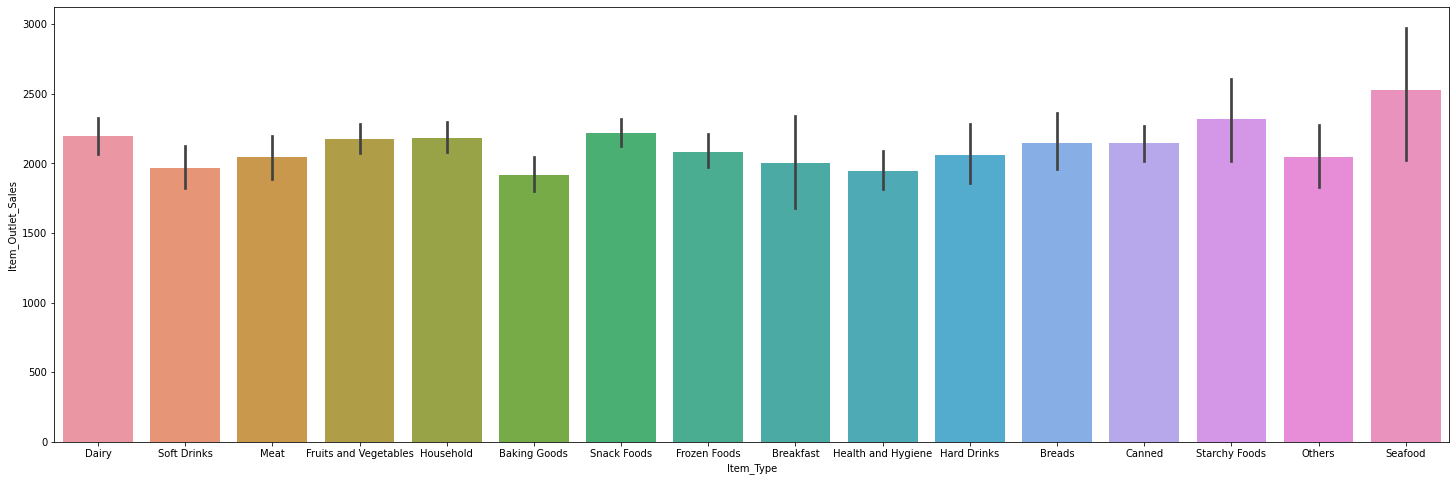

In [125]:
plt.figure(figsize=(25,8))

sns.barplot(data=sales_predictions_df, x="Item_Type", y="Item_Outlet_Sales")